#### This program was adopted from dphi. The code uses USArrest dataset to demonstrate how hierarchical clustering is conducted and the different types of heirarchical clustering.


In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")
crime.columns=['State','Murder','Assault','UrbanPop','Rape']

In [4]:
crime.shape

(50, 5)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Text(0.5, 1.0, 'Urban Population per State')

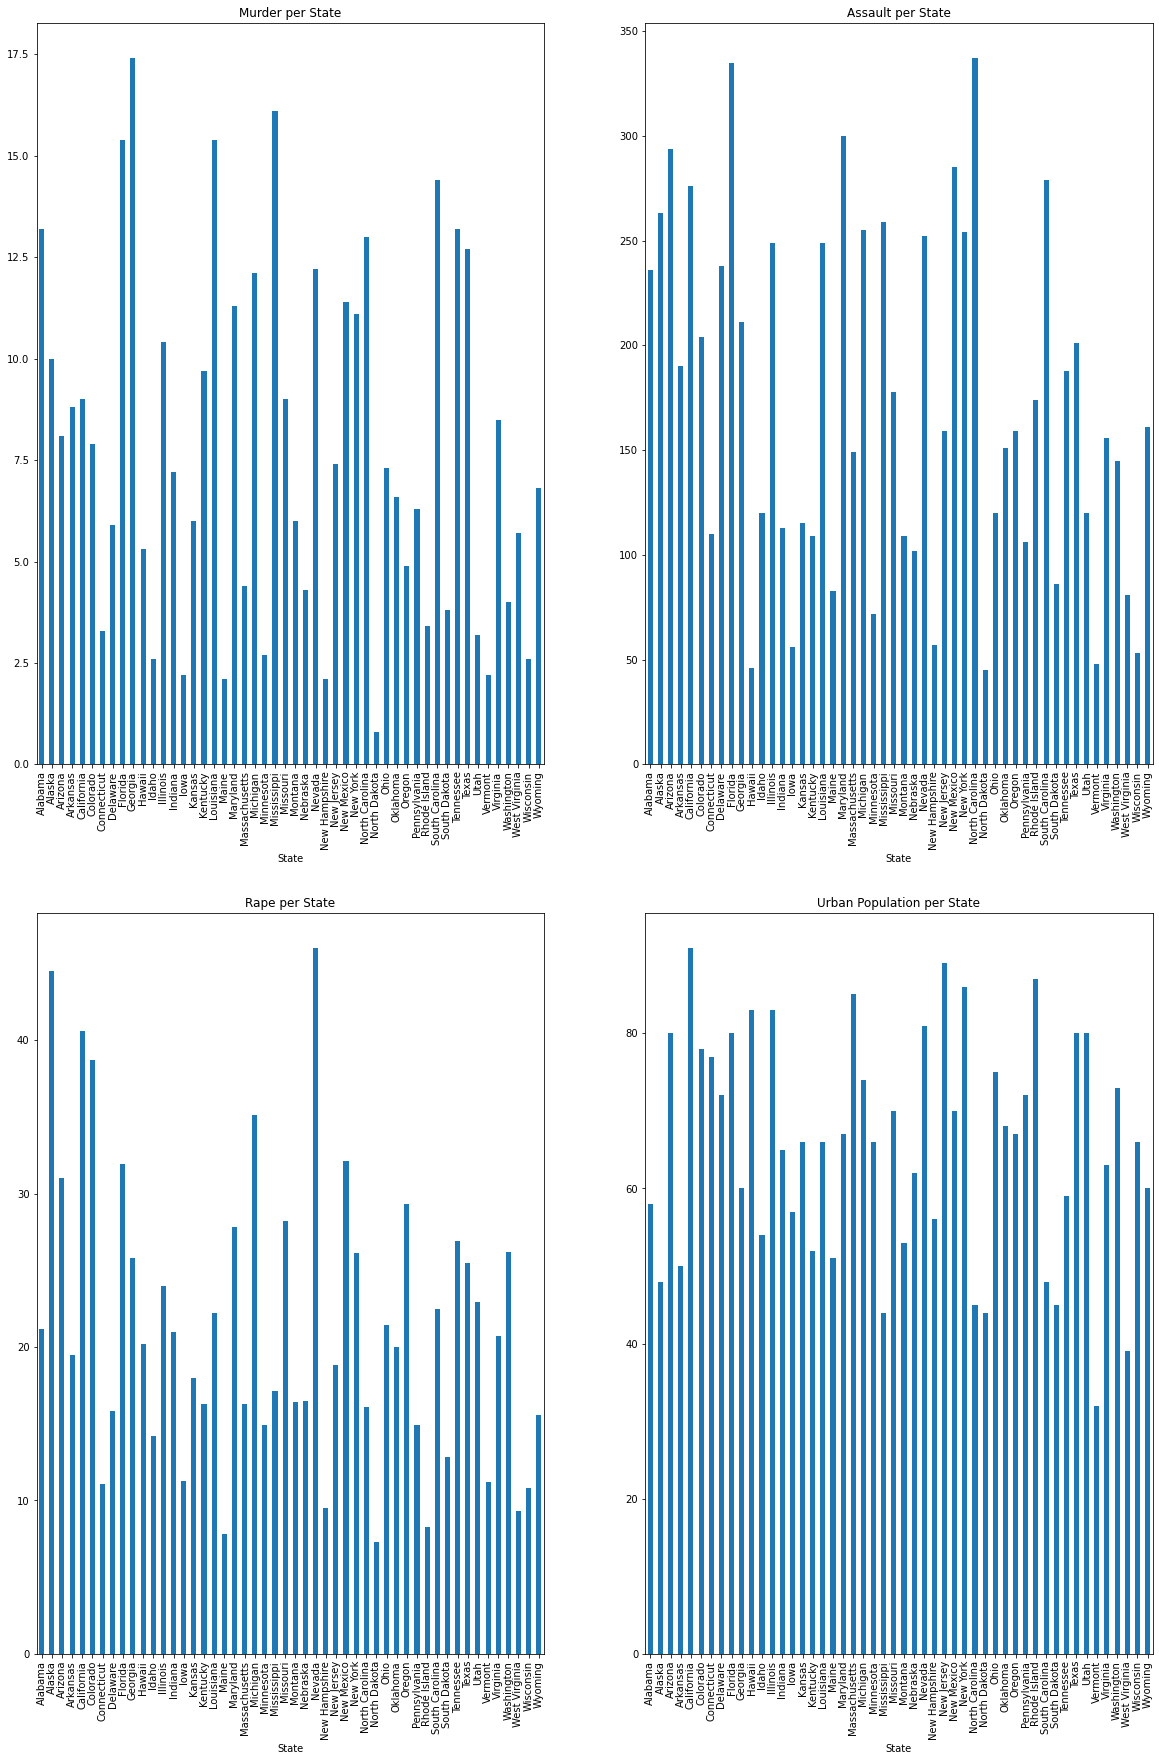

In [17]:
fig=plt.figure(figsize=(20,30))
fig.add_subplot(2,2,1)
crime.groupby('State')['Murder'].max().plot(kind='bar')
plt.title('Murder per State')
fig.add_subplot(2,2,2)
crime.groupby('State')['Assault'].max().plot(kind='bar')
plt.title('Assault per State')
fig.add_subplot(2,2,3)
crime.groupby('State')['Rape'].max().plot(kind='bar')
plt.title('Rape per State')
fig.add_subplot(2,2,4)
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')
plt.title('Urban Population per State')

Text(0, 0.5, 'Euclidean distances')

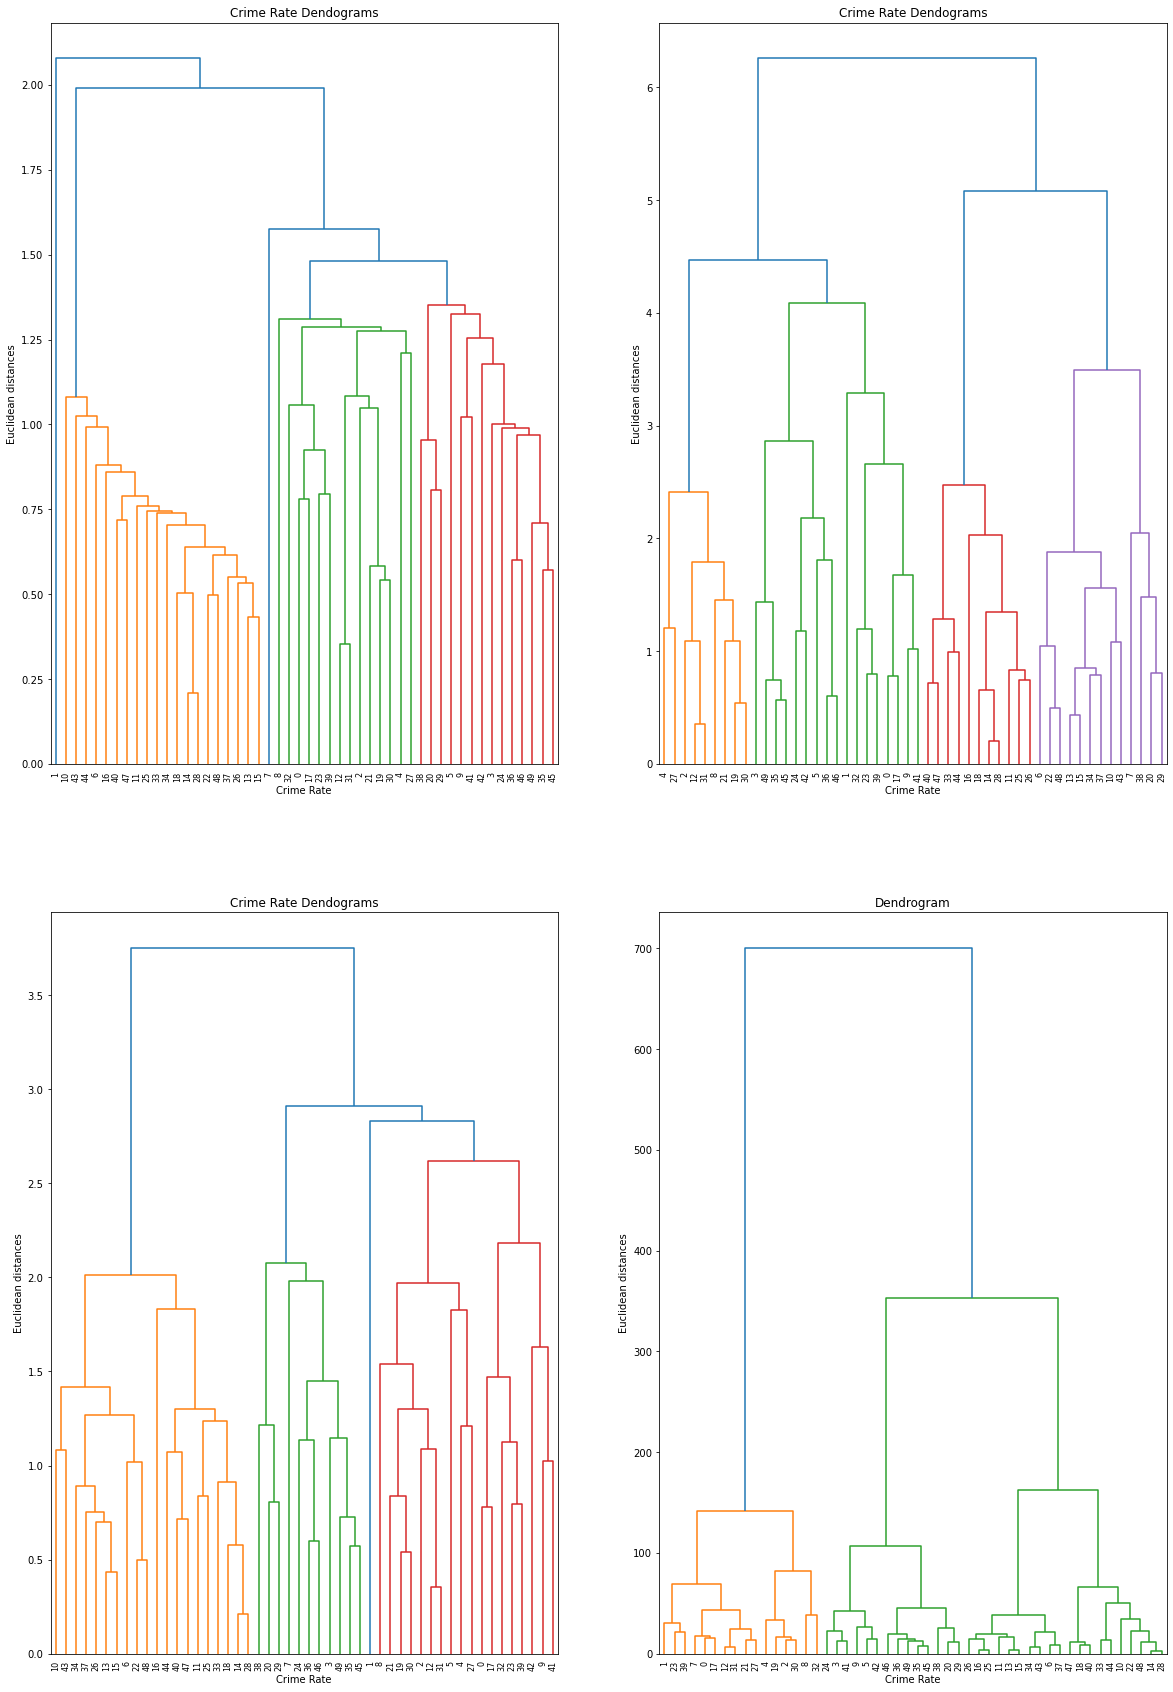

In [20]:
data = crime.iloc[:,1:].values

#Using sklearn.preprocessing.StandardScaler() to standardize the data points.
scaler= StandardScaler()
scaled_data = scaler.fit_transform(data)

fig = plt.figure(figsize=(20,30))

#Generating dendrograms for the dataset using different distance matrices (single, average, complete, and ward).
fig.add_subplot(2,2,1)
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

fig.add_subplot(2,2,2)
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

fig.add_subplot(2,2,3)
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

fig.add_subplot(2,2,4)
dendrogram = sch.dendrogram(sch.linkage(data, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

             State  cluster labels
0          Alabama               1
1           Alaska               1
2          Arizona               1
3         Arkansas               2
4       California               1
5         Colorado               2
6      Connecticut               0
7         Delaware               1
8          Florida               1
9          Georgia               2
10          Hawaii               0
11           Idaho               0
12        Illinois               1
13         Indiana               0
14            Iowa               0
15          Kansas               0
16        Kentucky               0
17       Louisiana               1
18           Maine               0
19        Maryland               1
20   Massachusetts               2
21        Michigan               1
22       Minnesota               0
23     Mississippi               1
24        Missouri               2
25         Montana               0
26        Nebraska               0
27          Nevada  

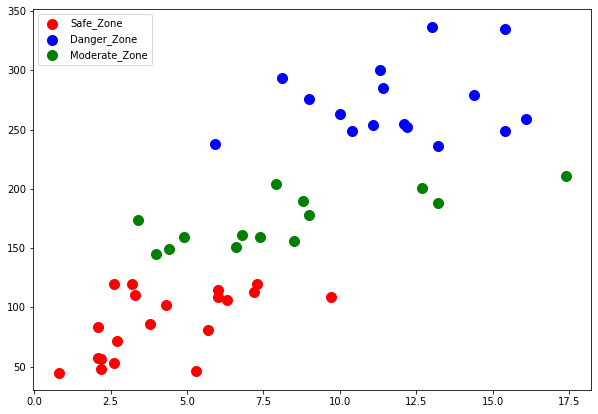

In [21]:
#Selecting the desired number of clusters and predicting labels for the different rows.
clusters = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
crime['cluster labels'] =clusters.fit_predict(data)

#Setting categories based on the cluster each state belongs to.
Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
plt.figure(figsize=(10,7))
plt.scatter(data[crime['cluster labels']==0, 0], data[crime['cluster labels']==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[crime['cluster labels']==1, 0], data[crime['cluster labels']==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[crime['cluster labels']==2, 0], data[crime['cluster labels']==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()

print(crime[['State','cluster labels']])